## Problem statement

##### Help the organization to Identify the defaulters before providing loan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load data &Overview

In [173]:
loantab_df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv')
loantab_df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


## Basic Load data &Overview

### shape of data

In [174]:
loantab_df.shape

(396030, 27)

In [175]:
loantab_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

### Target data splitage

Text(0.5, 1.02, 'Count of TARGET Variable per category')

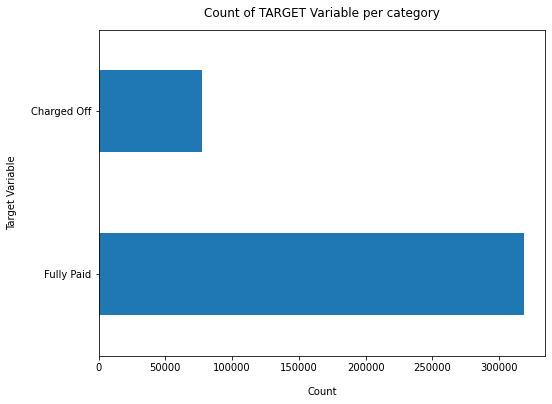

In [176]:
loantab_df['loan_status'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

In [177]:
loantab_df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

### data types of all the attributes

In [178]:
loantab_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [179]:
loantab_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

### Unique Values

In [180]:
loantab_df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

### Missing value & Dulcate check

In [181]:
loantab_df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [182]:
loantab_df.duplicated().sum()

0

### statical sumary

In [183]:
display(loantab_df.describe())

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


## Univaiate Anayysis

### countplots of the categorical variables

<AxesSubplot:xlabel='term', ylabel='count'>

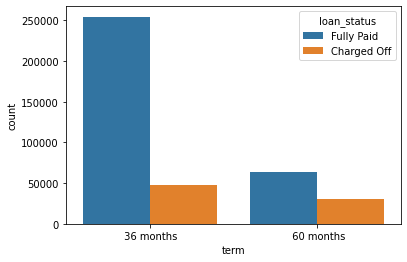

In [184]:
import seaborn as sns
sns.countplot(x=loantab_df["term"], hue='loan_status', data=loantab_df)

<AxesSubplot:xlabel='grade', ylabel='count'>

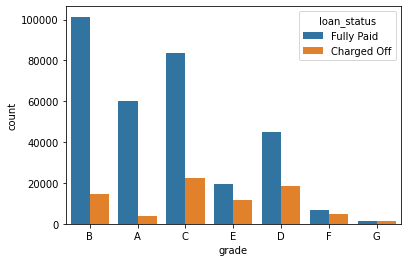

In [185]:
sns.countplot(x=loantab_df["grade"], hue='loan_status', data=loantab_df)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

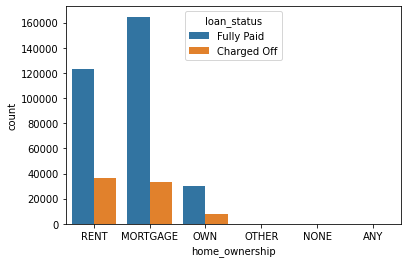

In [186]:
sns.countplot(x=loantab_df["home_ownership"], hue='loan_status', data=loantab_df)


<AxesSubplot:xlabel='verification_status', ylabel='count'>

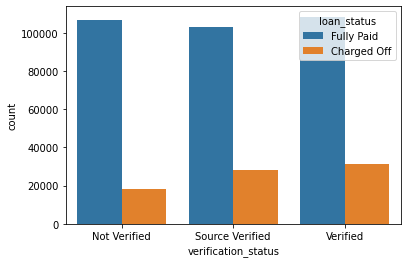

In [187]:
sns.countplot(x=loantab_df["verification_status"], hue='loan_status', data=loantab_df)

<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

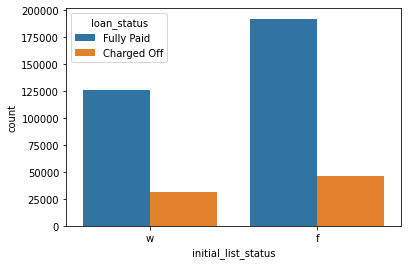

In [188]:
sns.countplot(x=loantab_df["initial_list_status"], hue='loan_status', data=loantab_df)


<AxesSubplot:xlabel='application_type', ylabel='count'>

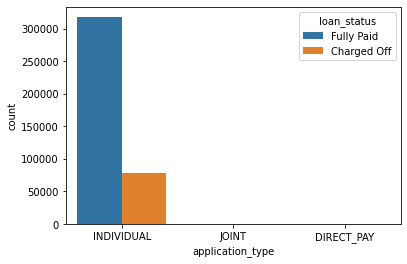

In [189]:
sns.countplot(x=loantab_df["application_type"], hue='loan_status', data=loantab_df)

## Bivariate Analysis

### Correlatio Marix

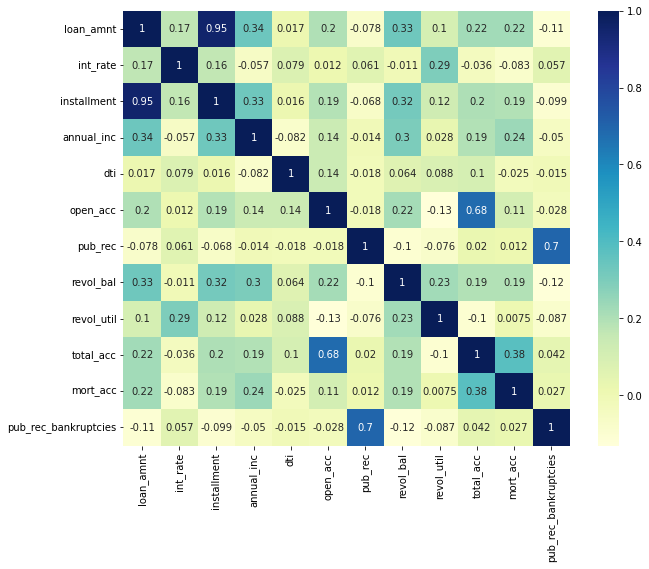

In [190]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(loantab_df.corr(), cmap="YlGnBu", annot=True)

## How much target variable (Loan_Status) depends on different predictor variables

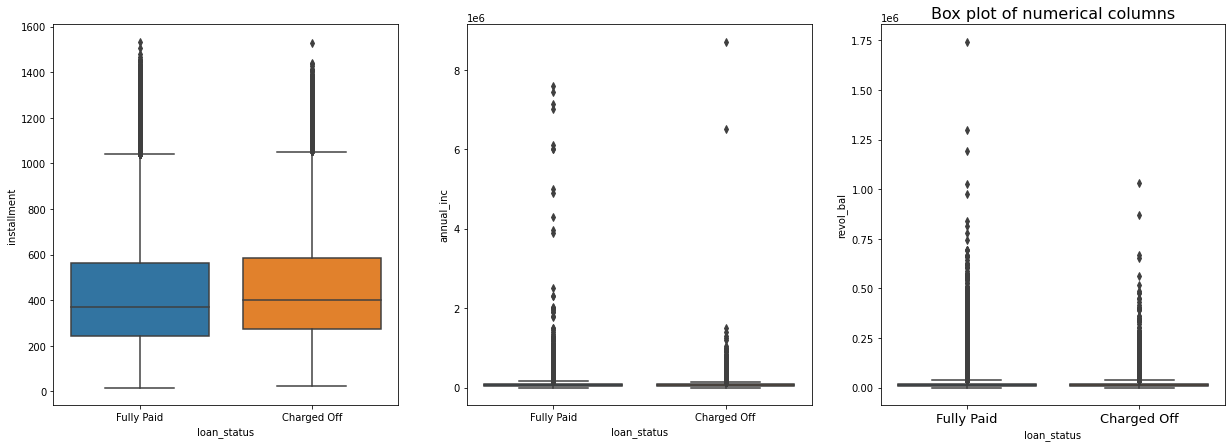

In [191]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(21,7))
sns.boxplot(x = 'loan_status', y = 'installment', data=loantab_df, ax=ax1)
sns.boxplot(x = 'loan_status', y = 'annual_inc', data=loantab_df, ax=ax2)
sns.boxplot(x = 'loan_status', y = 'revol_bal', data=loantab_df, ax=ax3)
plt.xticks(fontsize= 13)
plt.title('Box plot of numerical columns', fontsize=16);


### Scatter plot

<AxesSubplot:xlabel='installment', ylabel='annual_inc'>

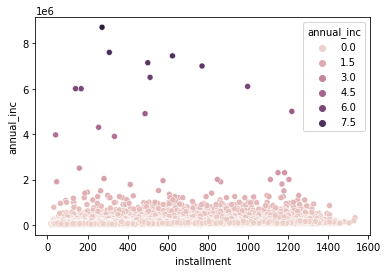

In [192]:
sns.scatterplot(data=loantab_df, x=loantab_df['installment'], y=loantab_df['annual_inc'], hue=loantab_df['annual_inc'])

## Basic Feature Engineering

#### Label encoding

In [193]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
category_column = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']

loantab_df[category_column] = loantab_df[category_column].apply(label_encoder.fit_transform)
loantab_df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,0,11.44,329.48,1,8,Marketing,1,5,117000.0,...,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,0,11.99,265.68,1,9,Credit analyst,4,1,65000.0,...,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,0,10.49,506.97,1,7,Statistician,10,5,43057.0,...,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,0,6.49,220.65,0,1,Client Advocate,6,5,54000.0,...,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,1,17.27,609.33,2,14,Destiny Management Inc.,9,1,55000.0,...,13.0,0.0,24584.0,69.8,43.0,0,1,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,1,10.99,217.38,1,8,licensed bankere,2,5,40000.0,...,6.0,0.0,1990.0,34.3,23.0,1,1,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,0,12.29,700.42,2,10,Agent,5,1,110000.0,...,6.0,0.0,43263.0,95.7,8.0,0,1,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,0,9.99,161.32,1,5,City Carrier,1,5,56500.0,...,15.0,0.0,32704.0,66.9,23.0,0,1,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,1,15.31,503.02,2,11,"Gracon Services, Inc",1,1,64000.0,...,9.0,0.0,15704.0,53.8,20.0,0,1,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [194]:
# loantab_df['loan_status'].value_counts()
# loantab_df['loan_status'] = loantab_df.loan_status.map({'Fully Paid': 0, 'Charged Off': 1})
loantab_df['loan_status'] = loantab_df.loan_status.map({'Fully Paid': 0, 'Charged Off': 1})
loantab_df['loan_status']

0         0
1         0
2         0
3         0
4         1
         ..
396025    0
396026    0
396027    0
396028    0
396029    0
Name: loan_status, Length: 396030, dtype: int64

#### Target encoding

In [195]:
from category_encoders import TargetEncoder
target_encoder = TargetEncoder()
loantab_df['emp_title'] = target_encoder.fit_transform(loantab_df['emp_title'], loantab_df['loan_status'])
loantab_df['issue_d'] = target_encoder.fit_transform(loantab_df['issue_d'], loantab_df['loan_status'])
loantab_df['title'] = target_encoder.fit_transform(loantab_df['title'], loantab_df['loan_status'])
loantab_df['earliest_cr_line'] = target_encoder.fit_transform(loantab_df['earliest_cr_line'], loantab_df['loan_status'])
loantab_df

C:\Users\mthiru947\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\mthiru947\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,0,11.44,329.48,1,8,0.247191,1,5,117000.0,...,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,0,11.99,265.68,1,9,0.316978,4,1,65000.0,...,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,0,10.49,506.97,1,7,0.181819,10,5,43057.0,...,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,0,6.49,220.65,0,1,0.196129,6,5,54000.0,...,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,1,17.27,609.33,2,14,0.196129,9,1,55000.0,...,13.0,0.0,24584.0,69.8,43.0,0,1,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,1,10.99,217.38,1,8,0.196129,2,5,40000.0,...,6.0,0.0,1990.0,34.3,23.0,1,1,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,0,12.29,700.42,2,10,0.220430,5,1,110000.0,...,6.0,0.0,43263.0,95.7,8.0,0,1,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,0,9.99,161.32,1,5,0.268657,1,5,56500.0,...,15.0,0.0,32704.0,66.9,23.0,0,1,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,1,15.31,503.02,2,11,0.196129,1,1,64000.0,...,9.0,0.0,15704.0,53.8,20.0,0,1,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


#### Assign 0/1

In [196]:
import numpy as np 
loantab_df['pub_rec'] = np.where(loantab_df['pub_rec'] > 1.0, 1, 0)
loantab_df['mort_acc'] = np.where(loantab_df['mort_acc'] > 1.0, 1, 0)
loantab_df['pub_rec_bankruptcies'] = np.where(loantab_df['pub_rec_bankruptcies'] > 1.0, 1, 0)
loantab_df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,0,11.44,329.48,1,8,0.247191,1,5,117000.0,...,16.0,0,36369.0,41.8,25.0,1,1,0,0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,0,11.99,265.68,1,9,0.316978,4,1,65000.0,...,17.0,0,20131.0,53.3,27.0,0,1,1,0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,0,10.49,506.97,1,7,0.181819,10,5,43057.0,...,13.0,0,11987.0,92.2,26.0,0,1,0,0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,0,6.49,220.65,0,1,0.196129,6,5,54000.0,...,6.0,0,5472.0,21.5,13.0,0,1,0,0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,1,17.27,609.33,2,14,0.196129,9,1,55000.0,...,13.0,0,24584.0,69.8,43.0,0,1,0,0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,1,10.99,217.38,1,8,0.196129,2,5,40000.0,...,6.0,0,1990.0,34.3,23.0,1,1,0,0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,0,12.29,700.42,2,10,0.220430,5,1,110000.0,...,6.0,0,43263.0,95.7,8.0,0,1,0,0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,0,9.99,161.32,1,5,0.268657,1,5,56500.0,...,15.0,0,32704.0,66.9,23.0,0,1,0,0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,1,15.31,503.02,2,11,0.196129,1,1,64000.0,...,9.0,0,15704.0,53.8,20.0,0,1,1,0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


## Missing values and Outlier Treatment

In [198]:
loantab_df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
title                     0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies      0
address                   0
dtype: int64

In [214]:
loantab_df.dropna(inplace=True)
loantab_df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

## Scaling

In [215]:
X = loantab_df.drop(columns=['loan_status', 'address'], axis=0)
X

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,0,11.44,329.48,1,8,0.247191,1,5,117000.0,...,0.152542,16.0,0,36369.0,41.8,25.0,1,1,0,0
1,8000.0,0,11.99,265.68,1,9,0.316978,4,1,65000.0,...,0.230063,17.0,0,20131.0,53.3,27.0,0,1,1,0
2,15600.0,0,10.49,506.97,1,7,0.181819,10,5,43057.0,...,0.219291,13.0,0,11987.0,92.2,26.0,0,1,0,0
3,7200.0,0,6.49,220.65,0,1,0.196129,6,5,54000.0,...,0.225683,6.0,0,5472.0,21.5,13.0,0,1,0,0
4,24375.0,1,17.27,609.33,2,14,0.196129,9,1,55000.0,...,0.192128,13.0,0,24584.0,69.8,43.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,1,10.99,217.38,1,8,0.196129,2,5,40000.0,...,0.197734,6.0,0,1990.0,34.3,23.0,1,1,0,0
396026,21000.0,0,12.29,700.42,2,10,0.220430,5,1,110000.0,...,0.224307,6.0,0,43263.0,95.7,8.0,0,1,0,0
396027,5000.0,0,9.99,161.32,1,5,0.268657,1,5,56500.0,...,0.180890,15.0,0,32704.0,66.9,23.0,0,1,0,0
396028,21000.0,1,15.31,503.02,2,11,0.196129,1,1,64000.0,...,0.140187,9.0,0,15704.0,53.8,20.0,0,1,1,0


In [216]:
y = loantab_df['loan_status']
y

0         0
1         0
2         0
3         0
4         1
         ..
396025    0
396026    0
396027    0
396028    0
396029    0
Name: loan_status, Length: 395754, dtype: int64

In [217]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [218]:
X

array([[-0.49258334, -0.5580236 , -0.49149302, ..., -0.00828671,
        -0.81486596, -0.07687379],
       [-0.73192567, -0.5580236 , -0.36850591, ..., -0.00828671,
         1.2271957 , -0.07687379],
       [ 0.17757517, -0.5580236 , -0.70392529, ..., -0.00828671,
        -0.81486596, -0.07687379],
       ...,
       [-1.09093916, -0.5580236 , -0.81573175, ..., -0.00828671,
        -0.81486596, -0.07687379],
       [ 0.82379944,  1.79203889,  0.37388899, ..., -0.00828671,
         1.2271957 , -0.07687379],
       [-1.44995264, -0.5580236 , -0.00625298, ..., -0.00828671,
        -0.81486596, -0.07687379]])

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model

In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score, precision_recall_curve, f1_score

In [227]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [228]:
# Predicting on the test data
y_pred= lr.predict(X_test)

#### Classification Report

In [264]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80     63717
           1       0.37      0.70      0.49     15434

    accuracy                           0.71     79151
   macro avg       0.64      0.71      0.64     79151
weighted avg       0.80      0.71      0.74     79151



#### Confusion Matrix

In [230]:
#Calculating and printing the f1 score 
f1_test = f1_score(y_test, y_pred)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
confusion_matrix(y_test, y_pred)

The f1 score for the testing data: 0.48624847581628505


array([[45632, 18085],
       [ 4667, 10767]], dtype=int64)

### ROC Curve

In [279]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import auc

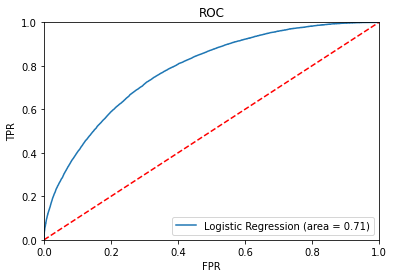

In [278]:
# lr_probs = lr.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thres = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
plt.figure()9
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

### Precision recall curve

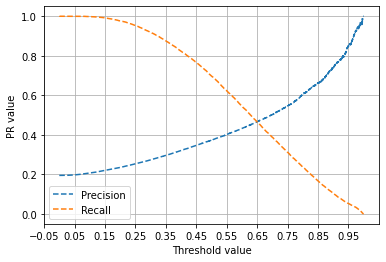

In [288]:

lr_probs = lr.predict_proba(X_test)
lr_precision, lr_recall, lr_threshold = precision_recall_curve(y_test, lr_probs[:,1])

lr_threshold_boundry = lr_threshold.shape[0]
plt.plot(lr_threshold, lr_precision[0:lr_threshold_boundry], linestyle='--', label='Precision')
plt.plot(lr_threshold, lr_recall[0:lr_threshold_boundry], linestyle='--', label='Recall')

st, end = plt.xlim()
plt.xticks(np.round(np.arange(st, end, 0.1), 2))

plt.xlabel('Threshold value')
plt.ylabel('PR value')
plt.legend(loc='lower left')
plt.grid()
plt.show()